In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data = pd.read_csv('diabetes.csv')

In [40]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
data.corr()['Outcome']

Pregnancies      0.221898
Glucose          0.466581
BloodPressure    0.065068
SkinThickness    0.074752
Insulin          0.130548
BMI              0.292695
Pedigree         0.173844
Age              0.238356
Outcome          1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

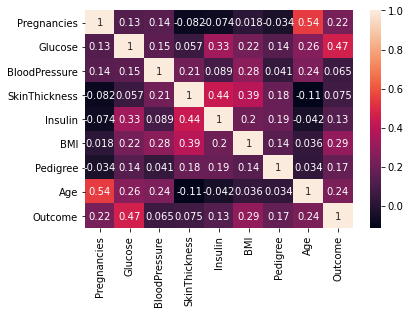

In [42]:
sns.heatmap(data.corr(), annot=True)

In [43]:
X = data.drop('Outcome', axis=1)

In [44]:
y = data['Outcome']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
scaler = StandardScaler()

In [50]:
knn = KNeighborsClassifier()

In [51]:
operations = [('scaler', scaler), ('knn', knn)]

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
pipe = Pipeline(operations)

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
k_values = list(range(1, 20))

In [56]:
param_grid = {'knn__n_neighbors':k_values}

In [57]:
full_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [58]:
full_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [59]:
full_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=7))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=7),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 7,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [69]:
y_pred = full_classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score


In [62]:
accuracy_score(y_test, y_pred)

0.696969696969697

In [63]:
error_rate= 1-accuracy_score(y_test, y_pred)
error_rate

0.303030303030303

In [64]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[121,  30],
       [ 40,  40]], dtype=int64)

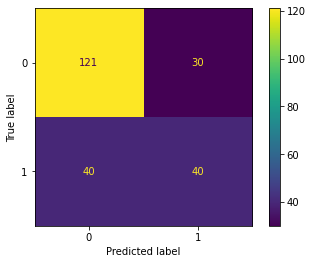

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
CMD=ConfusionMatrixDisplay(cm).plot()

In [66]:
precision=precision_score(y_test,y_pred)
precision

0.5714285714285714

In [67]:
recall=recall_score(y_test,y_pred)
recall

0.5

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       151
           1       0.57      0.50      0.53        80

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231

